<a href="https://colab.research.google.com/github/octaviosidoni/DataScience/blob/main/EntregaFinal_OctavioSidoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ENTREGA FINAL***

---



  **CURSO**: *Data Science*

  **COMISION**: *44725*

  **ALUMNO**: *Sidoni Octavio*

  **PROFESOR**: *Escalante Enrique*

  **TUTOR**: *Silvera David*
  
  **FECHA**: *27/08/2023*
  

#Definición de Objetivo
 ¿ Qué impacto tiene en el tránsito el accidente ocurrido?

#Introducción



Para la presente entrega final desarrollaré un Story Telling acerca del Data Set sobre los accidentes de transito en EE. UU.

El tema de estudio de mi proyecto es el análisis de los accidentes viales a lo largo y ancho de USA, analizando diferentes circunstancia que se dan luego del accidente como por ej:


1.   Como repertuce el accidente en  el tránsito.
2.   Que condiciones climáticas son mas comunes en el momento que se producen los accidentes.
3.  El lado de circulación afecta en el momento del accidente.
4. Cuanto tiempo afecta el accidente al tránsito hasta que vuelva a su curso normal.

Estos son algunos ejemplos de las preguntas que intentare responder más adelante.


##Contextos Comercial - Empresarial - Analítico

###**Contexto Comercial**:
El objetivo es  formatear los datos proporcionados y desarrollar visualizaciones que respondan las preguntas específicas, con el fin de llegar a una conclusión que explique el crecimiento de los accidentes y el tipo de impacto en el tránsito.

###**Contexto Empresarial:**
Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, donde se puede observar un crecimiento significativo en la cantidad de accidentes a traves de los años.

###**Contexto Analítico**
Se proporciona un archivo CSV que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, severidad, dáa, temperatura, zona, estado, etc.
Definiendo la columna "Severity" como la variable target a analizar en los estudios correspondientes del trabajo.


##Abstrac - Story Telling

Lo que me motiva a analizar los accidentes de tránsito en EE UU es el deseo de contribuir a mejorar la seguridad vial y reducir los incidentes que causan lesiones y pérdidas humanas. Me mueve la necesidad de comprender las causas subyacentes de los accidentes, investigar los factores que los desencadenan y encontrar soluciones efectivas para prevenirlos.

Siento un profundo interés por la seguridad pública y el bienestar de la comunidad. Analizar los accidentes de tránsito me brinda la oportunidad de investigar y examinar las estadísticas, los patrones y las tendencias, lo cual me permite identificar áreas problemáticas y proponer medidas preventivas adecuadas.

 Al analizar detalladamente los accidentes de tránsito, puedo proporcionar información valiosa a las autoridades de la ciudad, a las agencias de transporte y a la policía, para que puedan implementar políticas y medidas de seguridad más efectivas.

Asimismo, la posibilidad de generar conciencia pública sobre los riesgos y las mejores prácticas de conducción es otro factor motivador para mí. Al comprender las causas raíz de los accidentes y compartir mis hallazgos, espero educar a los conductores, peatones y ciclístas sobre los comportamientos seguros en las calles de EE UU.

Me hubiese encantado realizar el mismo trabajo con información de mi país(Argentina), pero lamentablemente no pude encontrar la información necesaria. De todos modos este trabajo puede servir para aplicarlo en mi pais en un futuro, adaptando el mismo a la información correspondiente.


#DA - Data Adquisition

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Importamos el Data Set
Df= pd.read_csv('/content/drive/MyDrive/CoderHouse/DataScience/Entregas/1 Entrega/Data Sets/US_Accidents_Dec21_updated.csv')

###**Descripción del Data Set** :
Este es un conjunto de datos de accidentes automovilísticos de todo el país (EE.UU), que cubre 49 estados. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes de tránsito. Actualmente, hay alrededor de 2,8 millones de registros de accidentes en este conjunto de datos.

Poder predecir cual es el nivel de impacto que tiene en el tránsito un accidente, utilizando como target la columna "Severity "; teniendo en cuenta las variables:

1. ID: Este es un identificador único del registro de accidentes.
2. Severity: Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, una breve demora como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, una gran demora).
3.  Start_Time: Muestra la hora de inicio del accidente en la zona horaria local.
4. End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
5. Start_Lat: Muestra la latitud en coordenadas GPS del punto de inicio.
6. Start_Lng: Muestra la longitud en coordenadas GPS del punto de inicio.
7. End_Lat: Muestra la latitud en coordenadas GPS del punto de fin.
8. End_Lng: Muestra la longitud en coordenadas GPS del punto de fin.
9. Distance(mi): La longitud de la extensión de la carretera afectada por el accidente.
10. Description: Muestra una descripción proporcionada por humanos del accidente.
11. Number: Muestra el número de calle en el campo de dirección
12. Street: Muestra el nombre de la calle en el campo de dirección.
13. Side: Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección.
14. City: Muestra la ciudad en el campo de dirección.
15. County: Muestra el pais en el campo de dirección.
16. State: Muestra el condado en el campo de dirección.
17. Zipcode: Muestra el codigo postal en el campo de dirección.
18. Country: Muestra el pais en el campo de dirección.
18. Timezone: Muestra la zona horaria según la ubicación del accidente (este, centro, etc.).
19. Airport_Code: Indica una estación meteorológica en el aeropuerto que es la más cercana al lugar del accidente.
20. Weather_Timestamp: Muestra la marca de tiempo del registro de observación meteorológica (en hora local).
21. Temperature(F): Muestra la temperatura (en Fahrenheit).
22. Wind_Chill(F): Muestra la sensación térmica (en Fahrenheit).
23. Humidity(%): Muestra la humedad (en porcentaje).
24. Pressure(in): Muestra la presión del aire (en pulgadas).
25. Visibility(mi): Muestra la visibilidad (en millas).
26. Wind_Direction: Muestra la dirección del viento.
27. Wind_Speed(mph): Muestra la velocidad del viento (en millas por hora).
28. Precipitation(in): Muestra la cantidad de precipitación en pulgadas, si hay alguna.
29. Weather_Condition: Muestra las condiciones meteorológicas (lluvia, nieve, tormenta, niebla, etc.)
30. Amenity: Una anotación de PDI que indica la presencia de un servicio en un lugar cercano.
31. Bump: Una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano.
32. Crossing: Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.
33. Give_Way: Una anotación de PDI que indica la presencia de ceder el paso en una ubicación cercana.
34. Junction: Una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.
35. No_Exit: Una anotación de PDI que indica la presencia de ninguna salida en una ubicación cercana.
36. Railway: Una anotación de PDI que indica la presencia de vías férreas en un lugar cercano.
37. Roundabout: Una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana.
38. Station: Una anotación de PDI que indica la presencia de una estación en una ubicación cercana.
39. Stop: Una anotación de PDI que indica la presencia de una parada en una ubicación cercana.
40. Traffic_Calming: Una anotación de PDI que indica la presencia de pacificación del tráfico en un lugar cercano.
41. Traffic_Signal: Una anotación de PDI que indica la presencia de un semáforo en un lugar cercano.
42. Turning_Loop: Una anotación de PDI que indica la presencia de un bucle de giro en una ubicación cercana.
43. Sunrise_Sunset: Muestra el período del día (es decir, día o noche) en función del amanecer/atardecer.
44. Civil_Twilight: Muestra el período del día (es decir, día o noche) según el crepúsculo civil.
45. Nautical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico.
46. Astronomical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronomico.

#EDA - Exploratory Data Analysis

In [ ]:
#Obtencion del Data Set
Df= pd.read_csv('/content/drive/MyDrive/CoderHouse/DataScience/Entregas/1 Entrega/Data Sets/US_Accidents_Dec21_updated.csv')

In [ ]:
#Pasos Exploratorios
Df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
Df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
Df.shape

(2845342, 47)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
Df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


#Hipótesis y Preguntas a Responder
1.   ¿Los accidentes registrados ocurren a lo largo y a lo ancho de EE. UU?
2.   ¿Varía la cantidad de accidentes dependiendo de la zona horaria?
3.   ¿Aumentan los accidentes a traves de los años?
4.   ¿Como influye el horario, día de semana y mes en la cantidad de accidentes?
5.   ¿Influye el lado de circulación en el accidente?
6.   ¿Como influye en clima en la cantidad de accidentes?

##1er Pregunta.##
##¿Los accidentes registrados ocurren a lo largo y a lo ancho de EE. UU?
Cuando grafico la latitud y la longitud de los accidentes, puedo ver que los accidentes se distribuyen de manera similar al mapa de EE. UU. Este no es un resultado sorprendente, recordando que la información es a nivel nacional.

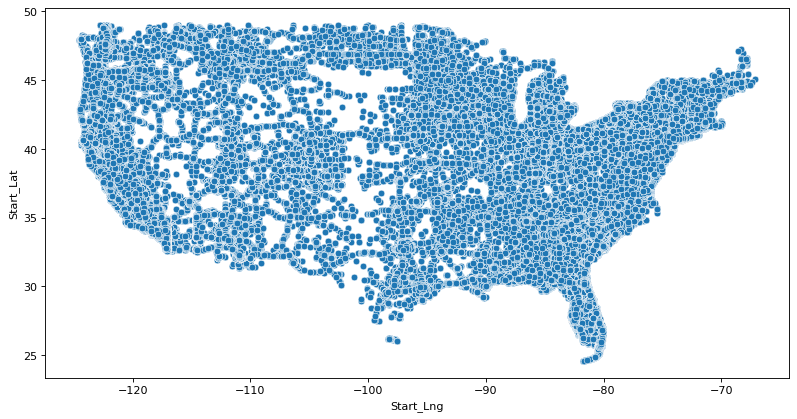

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax= sns.scatterplot(x = Df.Start_Lng, y = Df.Start_Lat)
plt.show()

##2da Pregunta
##¿Varía la cantidad de accidentes dependiendo de la zona horaria?
A traves del análisis llego a la conclusión que en las zonas costeras se producen el mayor numero de accidentes, agrupando el 77% del total de los accidentes en EE.UU

1.   US/Eastern	= 43%
2.   US/Pacific	= 34%
3.   US/Central	= 17%
4.   US/Mountain= 5%

In [ ]:
DfZona = Df.groupby('Timezone')['Severity'].count().reset_index().rename(columns={'index':'TimeZone', 'Severity':'Cases'})
DfZona

,Timezone,Cases
0,US/Central,488065
1,US/Eastern,1221927
2,US/Mountain,164597
3,US/Pacific,967094


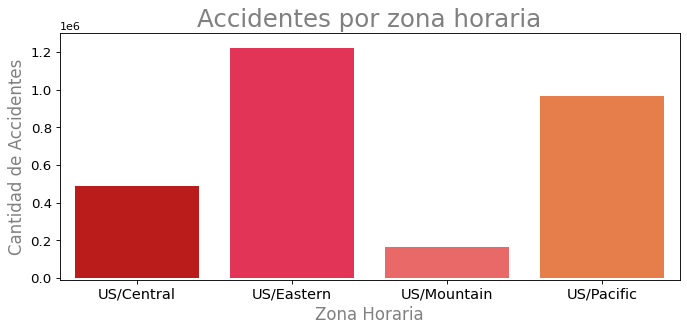

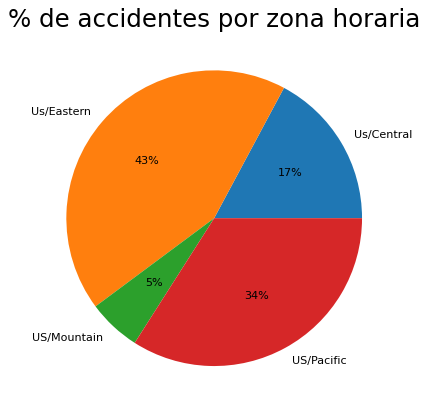

In [ ]:
ig, ax = plt.subplots(figsize = (10,4), dpi = 80)

ax=sns.barplot(y=DfZona['Cases'], x=DfZona['Timezone'],  palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(-10000, 1300000)
plt.title('Accidentes por zona horaria', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Zona Horaria', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

ZonaHoraria= ["Us/Central" , "Us/Eastern", "US/Mountain", "US/Pacific"]
fig, ax= plt.subplots(figsize=(18,6),dpi = 80)
plt.pie(DfZona['Cases'], labels= ZonaHoraria, autopct='%0.1i%%' )
ax.set_title("% de accidentes por zona horaria", fontsize=22)
plt.show()


##3ra Pregunta
## ¿Aumentan los accidentes a través de los años?
Noto un crecimiento exponencial en la cantidad de accidentes a medida que pasan los años.

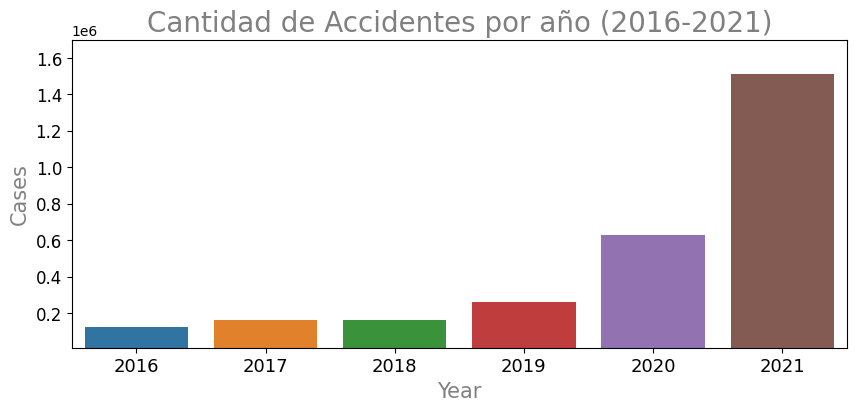

In [ ]:
# convertir  Start_Time & End_Time Variable en la funcion fecha y hora
Df.Start_Time = pd.to_datetime(Df.Start_Time)
Df.End_Time = pd.to_datetime(Df.End_Time)
Year = pd.DataFrame(Df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
Year

fig, ax = plt.subplots(figsize = (10,4))
plt.ylim(10000, 1700000)
plt.title('Cantidad de Accidentes por año (2016-2021)', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
ax=sns.barplot(y=Year['Cases'], x=Year['Year'])

##4ta Pregunta
##¿Como influye el horario, día de semana y mes en la cantidad de accidentes?
Horario:
La mayor cantidad de accidentes se ocasionan en el horario en que las personas salen del trabajo.

Días:
La mayor cantidad de accidentes se ocasionan en los dias laborales, siendo el dia viernes con mayor cantidad de accidentes. Luego observo que durante el fin de semana el número se reduce casi a mitad comparado con el viernes.

Meses:
La mayor cantidad de accidentes se ocasionan en el mes de diciembre.

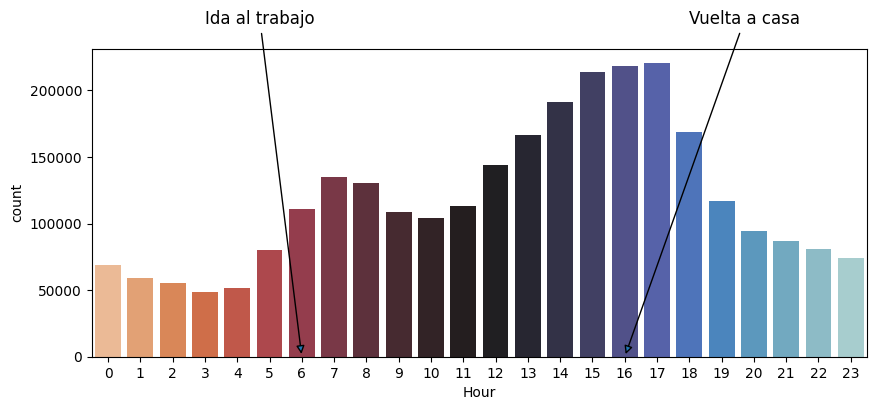

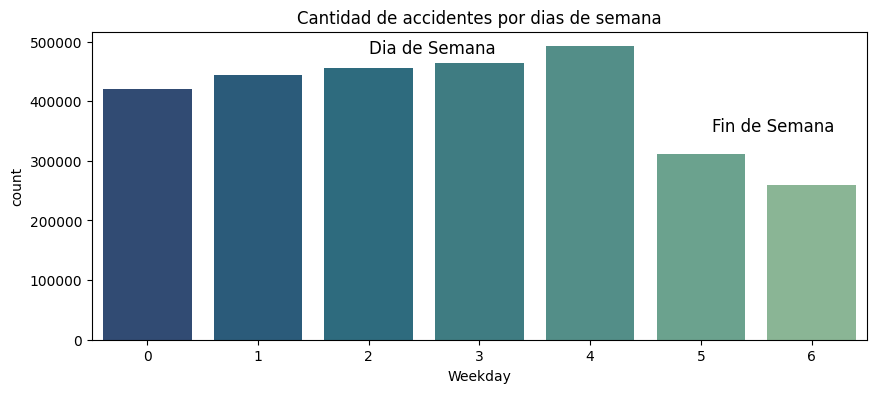

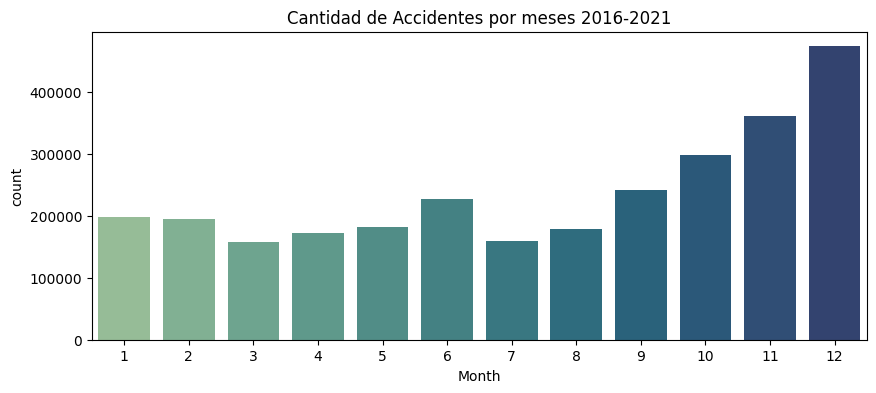

In [ ]:
Df['Month'] = Df['Start_Time'].dt.month
Df['Year'] = Df['Start_Time'].dt.year
Df['Hour'] = Df['Start_Time'].dt.hour
Df['Weekday'] = Df['Start_Time'].dt.weekday

fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x="Hour", data= Df, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('Ida al trabajo',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('Vuelta a casa',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

fig, ax = plt.subplots(figsize = (10,4))
c = sns.countplot(x="Weekday", data=Df, orient = 'v', palette = "crest_r")
plt.annotate('Dia de Semana',xy=(2,480000), fontsize=12)
plt.annotate('Fin de Semana',xy=(5.1,350000), fontsize=12)
c.set_title("Cantidad de accidentes por dias de semana")
plt.show()

fig, ax = plt.subplots(figsize = (10,4))
c = sns.countplot(x="Month", data=Df, orient = 'v', palette = "crest")
c.set_title("Cantidad de Accidentes por meses 2016-2021")
plt.show();

##Pregunta 5
##¿Influye el lado de conducción en la cantidad de accidentes?¿Y en la severidad?
Obervo que el 82% de los accidentes se producen del lado de conducción Derecho, mientras que la severidad del accidente no esta relacionada con el lado de conducción.

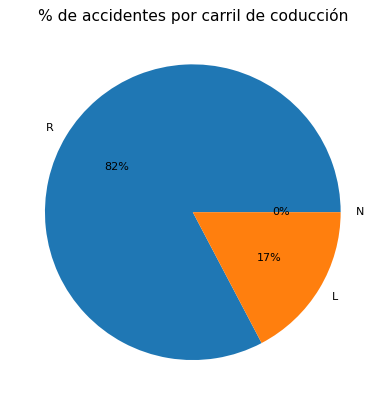

In [ ]:
Side_df = pd.DataFrame(Df['Side'].value_counts()).reset_index().rename(columns={'index':'Side', 'Side':'Cases'})

Lado= ["R" , "L", "N"]
Cases= Side_df['Cases']

fig, ax= plt.subplots(figsize=(18,6),dpi = 80)
plt.pie(Side_df['Cases'], labels= Lado, autopct='%0.1i%%' )
ax.set_title("% de accidentes por carril de coducción", fontsize=14)
plt.show()

##Pregunta 6##
##¿Cómo influye en clima en la cantidad de accidentes?
En este gráfico se puede observar como indicen las condiciones climaticas en  los accidentes en el transito entre los años (2016-2021).
Llegando a la conclusión de que los accidentes no se produccen por una condicion climática en especial.

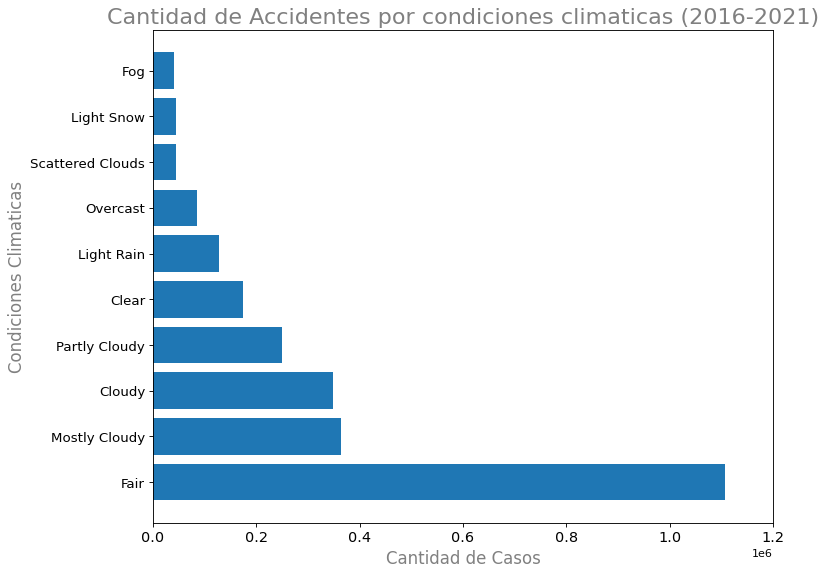

In [ ]:
weather_condition_df = pd.DataFrame(Df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

fig, ax = plt.subplots(figsize = (10,8), dpi = 80)
ax.barh(weather_condition_df['Weather_Condition'],weather_condition_df['Cases'])
plt.title('Cantidad de Accidentes por condiciones climaticas (2016-2021)', size=20, color='grey')
plt.xlabel('Cantidad de Casos', fontsize=15, color='grey')
plt.ylabel('Condiciones Climaticas', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 1200000)
plt.show()

#Data Wrangling

In [ ]:
#Orden, limpieza y preparación del Data Set.
df= Df

In [ ]:
#Cálculo de duracion en horas del accidente.
df['Duration(H)']=(pd.to_datetime(df.End_Time)-pd.to_datetime(df.Start_Time)).astype('timedelta64[h]')

In [ ]:
#Doy formanto a las columnas con fecha, para separarlas en año, mes, semana, día, hora, minutos.
df['Start_Time'] = pd.to_datetime(df['Start_Time'],
 format = '%Y-%m-%d %H:%M:%S',
 errors = 'coerce')

df['year'] = df['Start_Time'].dt.year
df['month'] = df['Start_Time'].dt.month
df['week'] = df['Start_Time'].dt.week
df['day'] = df['Start_Time'].dt.day
df['hour'] = df['Start_Time'].dt.hour
df['minute'] = df['Start_Time'].dt.minute
df['dayofweek'] = df['Start_Time'].dt.dayofweek

<ipython-input-66-f227e2088c81>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Start_Time'].dt.week


In [ ]:
#Elimino columnas innecesarias para el análisis.
df = df.drop(columns = ["ID","Number","Street","Side","City","County","State","Zipcode","Country","Timezone","Airport_Code","Start_Lat","Start_Lng","End_Lat","End_Lng","Start_Time","End_Time","Weather_Timestamp", "Description","Wind_Direction","Weather_Condition","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight", "Astronomical_Twilight","Turning_Loop"])
df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
0,3,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00,False,...,0,0,6.0,2016,2,6,8,0,37,0
1,2,0.747,36.9,NaN,91.0,29.68,10.0,NaN,0.02,False,...,5,0,6.0,2016,2,6,8,5,56,0
2,2,0.055,36.0,NaN,97.0,29.70,10.0,NaN,0.02,False,...,6,0,6.0,2016,2,6,8,6,15,0
3,2,0.123,39.0,NaN,55.0,29.65,10.0,NaN,NaN,False,...,6,0,6.0,2016,2,6,8,6,51,0
4,3,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01,False,...,7,0,6.0,2016,2,6,8,7,53,0


In [ ]:
#Filtro el data set por año = 2020 para reducir la cantidad de datos.
df= df.query('year == 2020')
df

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Hour,Weekday,Duration(H),year,month,week,day,hour,minute,dayofweek
232630,2,1.338,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,...,22,2,5776.0,2020,12,53,30,22,58,2
246924,2,1.107,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,...,19,1,6684.0,2020,10,42,13,19,19,1
247119,2,2.494,59.0,59.0,48.0,29.91,10.0,18.0,0.0,False,...,9,5,8977.0,2020,5,21,23,9,23,5
250560,2,0.841,60.0,60.0,64.0,29.96,10.0,7.0,0.0,False,...,19,1,8460.0,2020,10,42,13,19,19,1
279132,2,0.790,44.0,37.0,55.0,30.01,10.0,14.0,0.0,False,...,22,2,2181.0,2020,12,53,30,22,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362657,2,0.000,59.0,59.0,22.0,29.21,10.0,9.0,NaN,False,...,20,0,0.0,2020,1,2,6,20,59,0
2362658,2,0.000,43.0,43.0,86.0,29.85,5.0,3.0,0.0,False,...,21,0,2.0,2020,1,2,6,21,14,0
2362659,2,0.000,64.0,64.0,24.0,30.03,10.0,5.0,0.0,False,...,21,0,1.0,2020,1,2,6,21,19,0
2372960,2,0.473,28.0,19.0,92.0,29.06,7.0,9.0,0.0,False,...,0,2,0.0,2020,1,1,1,0,8,2


In [ ]:
#Elimino las columnas de añom ya que anteriormente filtre por año 2020.
df = df.drop(columns = ["year","Year"])

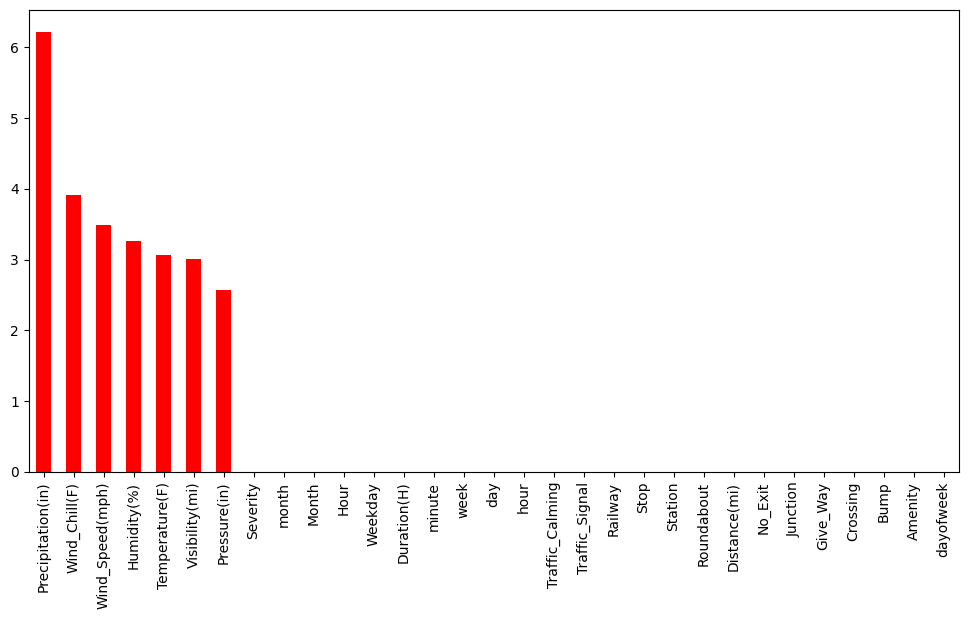

In [ ]:
#Visualizacion de nulos en porcentaje.
data_missing_values = df.isnull().sum().sort_values(ascending=False) / len(df) * 100
plt.figure(figsize=(12,6))
data_missing_values.plot(kind='bar', color='r')
plt.show()

In [ ]:
#Elimino los nulos ya que es un porcentaje muy bajo del total.
df.dropna(inplace=True)
df.isnull().sum()

Severity             0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Month                0
Hour                 0
Weekday              0
Duration(H)          0
month                0
week                 0
day                  0
hour                 0
minute               0
dayofweek            0
dtype: int64

# Feature Selecction

Luego de analizar el Data Set llego a la conclusión de que la variable target que vamos a predecir es la de 'Severity', se encuentra en una columna llamada "Severity"  donde muestra la gravedad y el impacto del accidente en el transito.

Es una variable de clasificacion de 4 estados


1.   Severity = 1
2.   Severity = 2
3.   Severity = 3
4.   Severity = 4

Donde 1 indica el menor impacto en el tránsito (es decir, una breve demora como resultado del accidente) y 4 indica un impacto significativo en el trásito (es decir, una gran demora).

La clasificación de esta variable se obtiene de la relacion de otras variables que estan expresadas en  el data set, como por ej:

* Dia
* Horario
* Clima
* Temp
* Humedad
* Viento
* Presion Atm
* Tiempo de accidente
* Distancia
* Cantidad de calles afectadas

El algortimo a utilizar para predecir la variable "Severity" es el de Ramdon Forest, por que para un conjunto de datos lo suficientemente grande produce un clasificador muy certero.

En la parte final del proyecto esta el desarrolo del porque el modelo Ramdom Forest es el elegido para este trabajo. El mismo fue comparado con otros 3 modelos de clasificacion, donde para decidir cual es el modelo optimo se tuvo en cuenta:  
* la precision de entrenamiento
* la precision de prediccion
* el tiempo de ejecucion.

In [ ]:
#Grafico en la cantidad de accidentes en funcion de la Severidad.
Severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})

Severity_df

,Severity,Cases
0,2,489875
1,3,40409
2,1,23596
3,4,20698


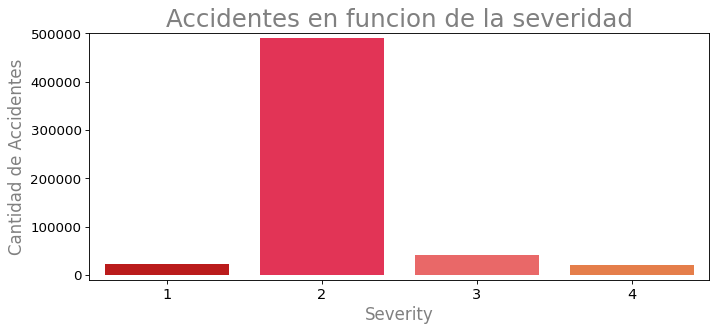

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), dpi = 80)
ax=sns.barplot(y=Severity_df['Cases'], x=Severity_df['Severity'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(-10000, 500000)
plt.title('Accidentes en función de la severidad', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Severity', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

## **Overfitting**

Este caso existe en la variable de Severidad = 2 . Esto lo comprobe trabajando previamente y analizando los resultados del modelo de clasificación con todos los datos del data set.

Para evitar esta condición lo que voy a  hacer es  equilibrar los datos, vamos a submuestrear todas las categorías al número de registros de la categoría minoritaria, en este caso la gravedad 4 (20.600 datos ).
Es decir tener las 4 variables a clasificar con la misma cantidad de datos, 20.000 de cada uno. Una vez que tengamos el data frame con la misma cantidad de muestras para cada variable a predecir ejecute nuevamente el modelo para poder analizar si mejora el comportamiento de Overfitting y el resultado fue positivo.

In [ ]:
#Separo en 4 data set con 20.000 datos de cada variable.
df1= df[df['Severity'] == 1].sample(n=20600)
df2= df[df['Severity'] == 2].sample(n=20600)
df3= df[df['Severity'] == 3].sample(n=20600)
df4= df[df['Severity'] == 4].sample(n=20600)


In [ ]:
#Uno los 4 data frame.
dfSub = pd.concat([df1, df2, df3, df4])
dfSub

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Month,Hour,Weekday,Duration(H),month,week,day,hour,minute,dayofweek
2274269,1,0.000,53.0,53.0,64.0,29.05,10.0,9.0,0.0,False,...,4,18,4,0.0,4,17,24,18,33,4
2166990,1,0.487,89.0,89.0,11.0,25.82,10.0,17.0,0.0,False,...,6,15,3,0.0,6,24,11,15,17,3
2185465,1,0.000,89.0,89.0,14.0,28.25,10.0,10.0,0.0,False,...,6,12,4,0.0,6,25,19,12,17,4
2126842,1,0.000,78.0,78.0,21.0,27.11,10.0,7.0,0.0,False,...,5,9,1,0.0,5,21,19,9,2,1
2227727,1,0.000,88.0,88.0,53.0,30.05,10.0,14.0,0.0,False,...,3,14,0,1.0,3,14,30,14,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259270,4,0.000,68.0,68.0,26.0,30.14,10.0,14.0,0.0,False,...,4,17,2,4.0,4,16,15,17,4,2
1931689,4,0.326,52.0,52.0,61.0,29.02,10.0,0.0,0.0,False,...,12,13,0,3.0,12,53,28,13,8,0
2087643,4,0.000,72.0,72.0,57.0,29.74,10.0,0.0,0.0,False,...,6,9,1,0.0,6,23,2,9,47,1
2193786,4,3.888,78.0,78.0,56.0,30.28,10.0,22.0,0.0,False,...,3,14,1,0.0,3,11,10,14,15,1


In [ ]:
dfSub1 = pd.DataFrame(dfSub['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})
dfSub1

,Severity,Cases
0,1,20600
1,2,20600
2,3,20600
3,4,20600


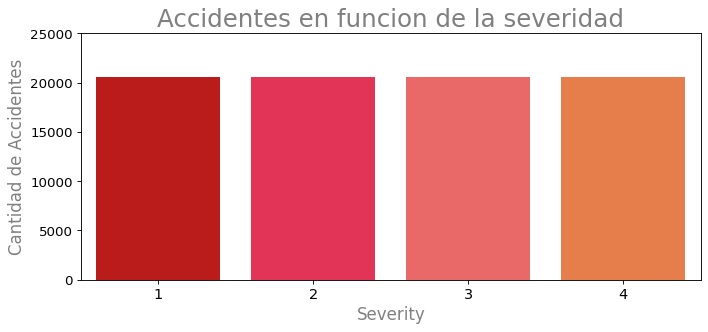

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), dpi = 80)
ax=sns.barplot(y=dfSub1['Cases'], x=dfSub1['Severity'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])
plt.ylim(0, 25000)
plt.title('Accidentes en funcion de la severidad', size=22, color='grey')
plt.ylabel('Cantidad de Accidentes', fontsize=15, color='grey')
plt.xlabel('Severity', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Grafico la matriz de correlación.
corr = dfSub.corr()
corr.style.background_gradient(cmap='coolwarm')

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Month,Hour,Weekday,Duration(H),month,week,day,hour,minute,dayofweek
Severity,1.000000,0.180465,-0.205205,-0.206326,0.176786,0.023409,-0.057931,0.008994,0.013407,-0.024295,-0.004435,-0.244837,-0.009986,0.062788,-0.028053,-0.033873,-0.006610,-0.040734,-0.006462,-0.005670,-0.222855,-0.015890,-0.031019,0.023151,0.030378,-0.015890,-0.016378,-0.006180,-0.031019,0.003924,0.023151
Distance(mi),0.180465,1.000000,-0.069341,-0.071585,0.058886,-0.038294,-0.031891,-0.010112,0.006600,-0.026793,-0.005298,-0.098984,-0.005604,0.032592,-0.012713,-0.021834,-0.001426,-0.043187,-0.007626,-0.006745,-0.122017,0.037057,-0.008533,-0.007066,0.018083,0.037057,0.037140,-0.002433,-0.008533,0.006619,-0.007066
Temperature(F),-0.205205,-0.069341,1.000000,0.993953,-0.459848,0.066323,0.199939,0.127566,-0.017384,0.009432,0.004247,0.207096,0.009316,-0.022718,0.030383,0.018551,0.003288,0.018130,-0.017218,0.002941,0.203155,-0.005927,0.191628,-0.017652,-0.001773,-0.005927,-0.006419,0.000787,0.191628,-0.007611,-0.017652
Wind_Chill(F),-0.206326,-0.071585,0.993953,1.000000,-0.439012,0.083702,0.201383,0.079467,-0.015097,0.010186,0.004942,0.199749,0.009240,-0.020970,0.029861,0.018143,0.003259,0.018024,-0.015221,0.003643,0.195378,0.001698,0.181724,-0.016148,-0.000856,0.001698,0.001031,-0.000345,0.181724,-0.007037,-0.016148
Humidity(%),0.176786,0.058886,-0.459848,-0.439012,1.000000,0.254727,-0.373610,-0.199542,0.178884,-0.019744,-0.008105,-0.268110,-0.016516,0.059544,-0.045727,-0.024002,-0.005115,-0.023371,-0.011304,-0.008016,-0.238510,0.089185,-0.248685,0.034675,0.020204,0.089185,0.098702,0.109118,-0.248685,0.001599,0.034675
Pressure(in),0.023409,-0.038294,0.066323,0.083702,0.254727,1.000000,-0.047113,-0.071912,0.022706,0.022949,0.004225,-0.120517,-0.008933,0.047450,-0.024750,0.008304,-0.000341,0.041257,-0.004696,0.008477,-0.093053,0.083949,-0.027343,0.013310,0.015473,0.083949,0.085767,0.024936,-0.027343,-0.006516,0.013310
Visibility(mi),-0.057931,-0.031891,0.199939,0.201383,-0.373610,-0.047113,1.000000,0.033573,-0.255549,0.011240,0.006187,0.079706,0.007787,-0.021437,0.015315,0.002693,0.001523,0.018713,-0.000066,0.005850,0.081235,0.014916,0.074789,-0.004095,-0.003531,0.014916,0.011232,-0.038464,0.074789,-0.001504,-0.004095
Wind_Speed(mph),0.008994,-0.010112,0.127566,0.079467,-0.199542,-0.071912,0.033573,1.000000,0.035497,0.007409,-0.004839,0.030782,0.010803,0.010373,0.006463,0.000338,-0.002216,0.021626,-0.005196,-0.004844,0.059503,-0.121900,0.142150,-0.037554,-0.009919,-0.121900,-0.124527,-0.036341,0.142150,-0.009267,-0.037554
Precipitation(in),0.013407,0.006600,-0.017384,-0.015097,0.178884,0.022706,-0.255549,0.035497,1.000000,-0.008560,-0.000538,-0.027967,-0.006883,0.020546,-0.006856,-0.001289,-0.000755,-0.010442,-0.010939,-0.000463,-0.033899,-0.029834,-0.006817,-0.002443,-0.001470,-0.029834,-0.027117,0.029406,-0.006817,0.023232,-0.002443
Amenity,-0.024295,-0.026793,0.009432,0.010186,-0.019744,0.022949,0.011240,0.007409,-0.008560,1.000000,-0.002590,0.116816,-0.001746,-0.035983,0.033857,0.077021,-0.000579,0.189533,0.018178,0.000267,0.107735,-0.013755,0.003859,-0.002346,-0.000442,-0.013755,-0.014685,-0.010119,0.003859,0.005170,-0.002346


#Desarrollo del Algoritmo

In [ ]:
#Selecciono las columnas predictorias(x) y la columna a predecir(y).
Xs = dfSub.drop(columns = ["Severity"])
Ys = dfSub['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(Xs , Ys, train_size= 0.85, random_state= 0)

#Entreno el modelo.
rf1 = RandomForestClassifier()
rf1.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred1= rf1.predict(X_test)
Y_pred1

array([4, 2, 1, ..., 4, 1, 4])

In [ ]:
Y_train1= rf1.predict(X_train)
Y_train1

array([3, 4, 3, ..., 3, 3, 4])

In [ ]:
#Genero la matriz de confusión.
Matriz_Confusion= confusion_matrix(Y_test, Y_pred1)
Matriz_Confusion

array([[2484,   46,  379,   97],
       [ 248, 2317,  314,  182],
       [ 474,   75, 2171,  410],
       [ 155,  539,  390, 2079]])

<Figure size 2000x2000 with 0 Axes>

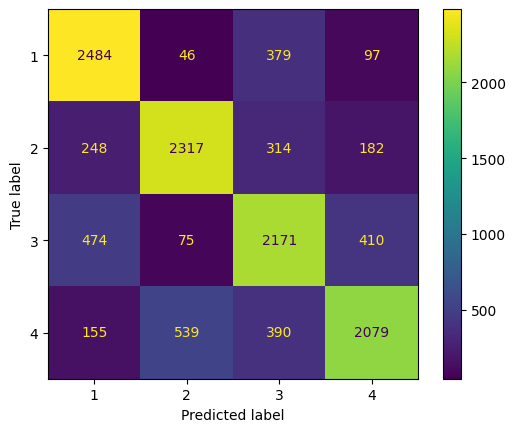

In [ ]:
#Grafico la matriz.
plt.figure(figsize=(20,20))
ConfusionMatrixDisplay.from_estimator(rf1, X_test, Y_test, display_labels=['1','2','3','4'])
plt.show()

In [ ]:
# Todas las metricas para el analisis de la matriz.
print(metrics.classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           1       0.74      0.83      0.78      3006
           2       0.78      0.76      0.77      3061
           3       0.67      0.69      0.68      3130
           4       0.75      0.66      0.70      3163

    accuracy                           0.73     12360
   macro avg       0.73      0.73      0.73     12360
weighted avg       0.73      0.73      0.73     12360



***Conlcusiones del Modelo***

El modelo tiene una exactitud de %73

F1- Score
1. El modelo  detecta la clase muy bien con un porcentaje de %79
2. El modelo  detecta la clase muy bien con un porcentaje de %77
3. El modelo  detecta la clase  bien con un porcentaje de %70
4. El modelo  detecta la clase  bien con un porcentaje de %71

Alta precisión en 3 de las 4 variables. Mayor precision en la clase 2, esto es un buen punto ya que la variable 2 ocupa el 85% del volumen de los datos antes del sampleo del data set.

Haciendo el sub muestro podemos ver como mejoran las metricas del modelo Ramdon Forest, sobre todo el recal y el f1 score. Esto quiere decir que tenemos un modelo que se ajusta a distintos conjutos datos que le pasemos para que analice.

#Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [ ]:
#Carga del data set
Dfcross= dfSub
Dfcross.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Month,Hour,Weekday,Duration(H),month,week,day,hour,minute,dayofweek
2274269,1,0.000,53.0,53.0,64.0,29.05,10.0,9.0,0.0,False,...,4,18,4,0.0,4,17,24,18,33,4
2166990,1,0.487,89.0,89.0,11.0,25.82,10.0,17.0,0.0,False,...,6,15,3,0.0,6,24,11,15,17,3
2185465,1,0.000,89.0,89.0,14.0,28.25,10.0,10.0,0.0,False,...,6,12,4,0.0,6,25,19,12,17,4
2126842,1,0.000,78.0,78.0,21.0,27.11,10.0,7.0,0.0,False,...,5,9,1,0.0,5,21,19,9,2,1
2227727,1,0.000,88.0,88.0,53.0,30.05,10.0,14.0,0.0,False,...,3,14,0,1.0,3,14,30,14,55,0


In [ ]:
#Selecciono las columnas predictorias(x) y la columna a predecir(y).
X = dfSub.drop(columns = ["Severity"])
Y = dfSub['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(Xs , Ys, train_size= 0.85, random_state= 0)

In [ ]:
#Dividimos el data set en 5 fold
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 65920, Test set:16480
Fold:2, Train set: 65920, Test set:16480
Fold:3, Train set: 65920, Test set:16480
Fold:4, Train set: 65920, Test set:16480
Fold:5, Train set: 65920, Test set:16480


In [ ]:
#Cross Validation
print(rf1.score(X,Y))


0.9587742718446602


##Conclusión Cross Validation

Luego de realizar el cross validation con k fold = 5, el modelo mejora notablemente su rendimiento, pasando de un accuracy de 73% a 95%.

#Comparación de Algoritmos


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Selecciono las columnas predictorias(x) y la columna a predecir(y).
Xs = dfSub.drop(columns = ["Severity"])
Ys = dfSub['Severity']

X_train, X_test, Y_train, Y_test = train_test_split(Xs , Ys, train_size= 0.85, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

escalador_estandar = StandardScaler()
escalador_estandar.fit(X_train)
x_train = escalador_estandar.transform(X_train)
x_test = escalador_estandar.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#Modelos a comprar = [MLPClassifier, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]
import time
def test_model(modelo):
  model = modelo()
  start_time = time.time()
  random = model.fit(x_train, Y_train)
  predictioncs2 = random.predict(x_test)
  end_time = time.time()
  train_score = random.score(x_train, Y_train)
  pred_score = random.score(x_test, Y_test)
  elapsed_time = end_time - start_time
  return print('El modelo: {}\nPrecisión de entrenamiento = {}\nPrecisión de predicción = {}\nTiempo = {}'.format(modelo,train_score, pred_score, elapsed_time))

In [ ]:
test_model(KNeighborsClassifier)

El modelo: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Precisión de entrenamiento = 0.6996716162193033
Precisión de predicción = 0.5568770226537216
Tiempo = 6.3272199630737305


In [ ]:
test_model(DecisionTreeClassifier)

El modelo: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Precisión de entrenamiento = 0.9987435750999429
Precisión de predicción = 0.5396440129449838
Tiempo = 9.358628988265991


In [ ]:
test_model(MLPClassifier)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
Precisión de entrenamiento = 0.6540548258138207
Precisión de predicción = 0.6276699029126214
Tiempo = 214.26911902427673


In [ ]:
test_model(RandomForestClassifier)

El modelo: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Precisión de entrenamiento = 0.9987435750999429
Precisión de predicción = 0.6450647249190938
Tiempo = 69.0591332912445


##Algoritmo Seleccionado

El algoritmo seleccionado para el estudio de los accidentes en EE. UU es el Ramdom Forest Classifier, por los siguientes motivos:



1.   El de mayor precisión de entrenamiento (99%) de los 4 modelos analizados
2.   El de mayor precisión de predicción (65%) de los 4 modelos analizados
3.  Es el segundo con mayor tiempo de ejecución (69seg), al ser un tiempo bajo es posible elegirlo desistimando este valor ya que no genera un gran consumo de recursos durante un periodo de tiempo prolongado.




#**Conclusiones Finales**

## *Conclusiones obtenidas luego del EDA*

*   Cuando miramos la latitud y la longitud de los accidentes, podemos ver que los accidentes se distribuyen de manera similar al mapa de América. Este no es un resultado sorprendente, sabiendo que los datos obtenidos son a nivel nacional.

*   A través del análisis llegué a la conclusión que en las zonas costeras se producen el mayor numero de accidentes, agrupando el 77% del total de los accidentes en EE.UU.

* Hay un crecimiento exponencial en la cantidad de accidentes a medida que pasan los años.

*  Horario:
La mayor cantidad de accidentes se ocasionan en el horario en que las personas salen del trabajo (16/17hs).

* Días:
La mayor cantidad de accidentes se ocasionan en los dias laborales, siendo el dia viernes con mayor cantidad de accidentes. Luego observamos que durante el fin de semana el número se reduce casi a mitad comparado con el día viernes.

* Meses:
La mayor cantidad de accidentes se ocasionan en el mes de diciembre.

* Obervamos que el 82% de los accidentes se producen del lado de conducción Derecho, mientras que la severidad del accidente no esta relacionada con el lado de conducción, es decir que la severidad mantiene la tendencia de grando 2 sin importar el lado de conducción donde ocurra el accidente.

* Los accidentes no se produccen por una condición climática en especial, es más un alto porcentaje de los accidentes ocurren en condiciones normales.

* La Severidad de los accidentes se mantiene constante a lo largo de los años, es decir que por más que el crecimiento en cantidad de accidentes sea exponencial no varía el modo en que impacta en el transito manteniendo la Severidad de grado 2 la que tiene mayor participacion en el total de los datos.


##*Conclusiones obtenidas luego del entrenamiento del modelo.*

* El modelo de prediccion elegido es el de Ramdom Forest, ya que fue el que mejor desempeño arrojó sobre los datos luego de compararlo con los modelos de Decision Tree, K-Neighbors y MLP. (Todos los modelos analizan target de clasificación)

* El modelo seleccionado tiene un gran desempeño en cuanto a precisión de etrenamiento, precisión de predicción y tiempo de ejecución.

* El data set obtenido presentaba una gran cantidad de datos de una sola posiblidad de Severidad (grado 2), por lo que tuve que trabajar para igualar la cantidad de datos en todas la posiblidades de Severidad para evitar el overfitting y de esta manera logré entrenar el modelo para que se adapte a cualqueir circunstacia de Severidad y no tienda a diferenciar solo la Severidad de grado 2.

* Gracias a lo mencionado en el punto anterior puedo confirmar que tambien logre evitar el underfitting en las Severidades distintas a 2, es decir en los grados 1,3, y 4 que eran las menos comunes que ocurran pero no las menos importantes.

* Luego de realizar el Cross Validation el desempeño del modelo elegido (Ramdom Forest) mejoró notablemente.

